In [5]:
import os
os.environ["API_KEY"] = "*"


In [6]:
from dataclasses import dataclass
from datetime import datetime
import isodate
import googleapiclient.discovery
import googleapiclient.errors
import matplotlib.pyplot as plt
import numpy as np


In [7]:

# -*- coding: utf-8 -*-

# Sample Python code for youtube.playlistItems.list
# See instructions for running these code samples locally:
# https://developers.google.com/explorer-help/code-samples#python
api_service_name = "youtube"
api_version = "v3"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=os.environ["API_KEY"])


scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

# Video(**{'videoId': 'HwKjtJ1unlQ', 'videoPublishedAt': '2022-04-01T14:00:16Z'})


In [8]:
@dataclass
class Video:
    videoId: str
    videoPublishedAt: str
    _video: dict = None  # type: ignore

    @property
    def published_date(self) -> datetime:
        return datetime.strptime(
            self.videoPublishedAt,
            "%Y-%m-%dT%H:%M:%SZ")

    @property
    def video(self):
        if (self._video is None):
            request = youtube.videos().list(
                part="snippet,contentDetails,statistics",
                id=self.videoId
            )
            self._video = request.execute()['items'][0]
        return self._video

    @property
    def duration(self):
        return isodate.parse_duration(
            self.video['contentDetails']['duration']).total_seconds()


@dataclass
class PlayList:
    list_id: str

    @property
    def videos(self):
        response = self.fetch_videos()
        has_more = True
        while (has_more):
            for element in response["items"]:
                try:
                    yield Video(**element['contentDetails'])
                except TypeError:
                    pass
            if ("nextPageToken" in response):
                response = self.fetch_videos(token=response["nextPageToken"])
            else:
                has_more = False

    def fetch_videos(self, token=None):
        request = youtube.playlistItems().list(
            part="contentDetails",
            maxResults=50,
            playlistId="PLjJNtVylHOh_eq3L9z5NQbdbNoHIXnDhm",
            pageToken=token
        )
        response = request.execute()
        return response
    
data_points = sorted([
    (video.published_date, video.duration)
    for video in PlayList("PLjJNtVylHOh_eq3L9z5NQbdbNoHIXnDhm").videos],key=lambda x : x[0])


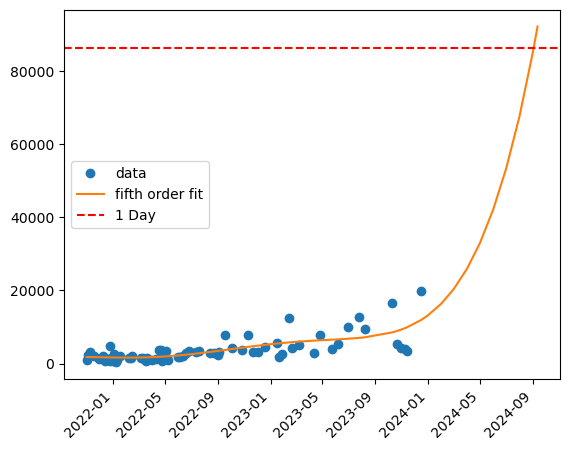

In [9]:

# Separate the list into x and y values
x_t: list[float] = [item[0].timestamp() for item in (data_points)]
x: list[datetime] = [item[0] for item in data_points]
y: list[float] = [item[1] for item in data_points]

# # Fit a first order polynomial
# z1 = np.polyfit(x_t, y, 1)
# # Fit a second order polynomial
# z2 = np.polyfit(x_t, y, 2)
# # Fit a third order polynomial
# z3 = np.polyfit(x_t, y, 3)
z5 = np.polyfit(x_t, y, 5)

prediction = [datetime(x,y,1) for x in range(2024,2025) for y in range(1,10)] + [datetime(2024,9,12)]
x_d = x + prediction
x_t+=[date.timestamp() for date in prediction]
# # Evaluate the polynomial at x values
# y1 = np.polyval(z1, x_t)
# # Evaluate the polynomial at x values
# y2 = np.polyval(z2, x_t)
# # Evaluate the polynomial at x values
# y3 = np.polyval(z3, x_t)
y5 = np.polyval(z5, x_t)

# Plot the data and the fitted line
plt.plot(x, y, 'o', label='data')
# plt.plot(x_d, y1, '-', label='first order fit')
# # Plot the data and the fitted parabola
# plt.plot(x_d, y2, '-', label='second order fit')
# # Plot the data and the fitted cubic
# plt.plot(x_d, y3, '-', label='third order fit')
plt.plot(x_d, y5, '-', label='fifth order fit')

plt.axhline(y = (24*60*60), color = 'r', linestyle = '--', label="1 Day")

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [10]:
coeffs = z5
# Subtract a day from the constant term
coeffs[-1] -= 24*60*60

# Find the roots of the new polynomial
roots = np.roots(coeffs)
day_of_rapture = [datetime.fromtimestamp(x) for x in [int(r) for r in roots if np.isreal(r)]][0]
day_of_rapture.strftime("%c")

E:\Users\yasok\AppData\Local\Temp\ipykernel_17132\2443546016.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  day_of_rapture = [datetime.fromtimestamp(x) for x in [int(r) for r in roots if np.isreal(r)]][0]


'Tue Sep  3 02:50:23 2024'

# On the day of our lord **Tue Sep  3 02:50:23 2024** we will reach the the Platoon Singularity, where for a brief moment in time we will be able to enjoy 24/7 platoon content, after which the universe will most likely fold in onto itself to accommodate Platoon talking for more than 24 hours in 24 hours.